## Лабораторная работа №1. Логистическая регрессия в качестве нейронной сети
Данные: В работе предлагается использовать набор данных notMNIST, который состоит из изображений размерностью 28×28 первых 10 букв латинского алфавита (A … J, соответственно). Обучающая выборка содержит порядка 500 тыс. изображений, а тестовая – около 19 тыс.

Данные можно скачать по ссылке:
https://commondatastorage.googleapis.com/books1000/notMNIST_large.tar.gz (большой набор данных);
https://commondatastorage.googleapis.com/books1000/notMNIST_small.tar.gz (маленький набор данных);
Описание данных на английском языке доступно по ссылке:
http://yaroslavvb.blogspot.sg/2011/09/notmnist-dataset.html

#### Задание 1.
Загрузите данные и отобразите на экране несколько из изображений с помощью языка Python;

In [31]:
import os
import tarfile

data_folder = '../data'

def extract(name):
    path = os.path.join(data_folder, name)

    with tarfile.open(path) as tar:
        tar.extractall(data_folder)

In [32]:
active_dataset = 'notMNIST_large'
extract(active_dataset + '.tar.gz')

In [4]:
import numpy as np
import matplotlib.image as mpimg

def load_data(name, classes, n):
    X = []
    y = []

    path = os.path.join(data_folder, name)

    for letter_path, dir_names, file_names in os.walk(path):
        for file_name in file_names:
            try:
                img_path = os.path.join(letter_path, file_name)
                img = mpimg.imread(img_path)
                img = img.reshape(1, n).T
                
                X.append(img)

                letter_class = os.path.basename(letter_path)
                index = classes.index(letter_class)
                
                y.append(index)
            except:
                pass

    m = len(X)
    X = np.array(X).T.reshape((n, m))
    y = np.array(y).T.reshape((1, m))

    return X, y

In [5]:
h = 28
w = 28
n = h * w
classes=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
X, y = load_data(active_dataset, classes, n)

In [6]:
import matplotlib.pyplot as plt

def plot_images(X, h, w):
    count = 10
    
    indexes = np.random.randint(0, X.shape[1], count)

    fig, axises = plt.subplots(1, len(indexes), figsize=(5, 5))

    for i in range(len(indexes)):
        img = X[:, indexes[i]].reshape(h, w)
    
        axis = axises[i]
        axis.imshow(img)
        axis.axis('off')
    
    plt.show()

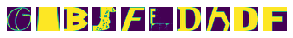

In [12]:
plot_images(X, h, w)

#### Задание 2.
Проверьте, что классы являются сбалансированными, т.е. количество изображений, принадлежащих каждому из классов, примерно одинаково (В данной задаче 10 классов).

In [13]:
from collections import Counter

Counter(y[0])

Counter({2: 52912,
         6: 52912,
         7: 52912,
         4: 52912,
         8: 52912,
         9: 52911,
         3: 52911,
         1: 52911,
         5: 52912,
         0: 52909})

Задание 3.
Разделите данные на три подвыборки: обучающую (200 тыс. изображений), валидационную (10 тыс. изображений) и контрольную (тестовую) (19 тыс. изображений);

In [14]:
def split_data(X, Y, borders):
    p = np.random.permutation(X.shape[1])

    return np.hsplit(X[:, p], borders), np.hsplit(Y[:, p], borders)

In [16]:
X_split, y_split = split_data(X, y, [200000, 200000 + 10000, 200000 + 10000 + 19000])

X_train = X_split[0]
X_dev = X_split[1]
X_test = X_split[2]

y_train = y_split[0]
y_dev = y_split[1]
y_test = y_split[2]

#### Задание 4.
Проверьте, что данные из обучающей выборки не пересекаются с данными из валидационной и контрольной выборок. Другими словами, избавьтесь от дубликатов в обучающей выборке.

In [28]:
import hashlib

def remove_duplicates(name):
    unique = set()
    
    path = os.path.join(data_folder, name)
    
    for letter_path, dir_names, file_names in os.walk(path):
        for file_name in file_names:
            img_path = os.path.join(letter_path, file_name)
            
            with open(img_path, 'rb') as file:
                hash = hashlib.md5(file.read()).hexdigest()
            
            if hash in unique: 
                os.remove(img_path)
            
            unique.add(hash)
    

In [33]:
remove_duplicates(active_dataset)

#### Задание 5.
Постройте простейший классификатор (например, с помощью логистической регрессии). Постройте график зависимости точности классификатора от размера обучающей выборки (50, 100, 1000, 50000). Для построения классификатора можете использовать библиотеку SkLearn (http://scikit-learn.org).

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

def train(X_train, y_train):
    logistic_model = LogisticRegression(max_iter=700)
    model = OneVsRestClassifier(logistic_model).fit(X_train, y_train)
    return model 

In [46]:
train_sizes = [50, 100, 1000, 50000]

dev_result = []
test_result = []

for size in train_sizes:
    model = train(X_train[:, :size].T, y_train[:, :size].T)
    
    dev_result.append(model.score(X_dev.T, y_dev.T))
    test_result.append(model.score(X_test.T, y_test.T))

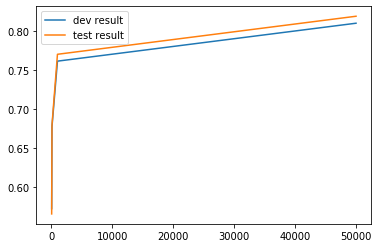

In [48]:
plt.plot(train_sizes, dev_result, label='dev result')
plt.plot(train_sizes, test_result, label='test result')
plt.legend()
plt.show()
